## Urban Audio Classification

Download the dataset of Urban audio sounds from the following link. Data comprise of around 8.7K sounds of 10 different categories. It has metadata folder for information of each audio category. <br>

https://urbansounddataset.weebly.com/download-urbansound8k.html

Credits --> YouTube channel of Krish Naik <br>
https://www.youtube.com/channel/UCNU_lfiiWBdtULKOw6X0Dig

Read of more knowladge on sounds classification <br>
https://mikesmales.medium.com/sound-classification-using-deep-learning-8bc2aa1990b7

Package Librosa convert the audio file into mono channel and normalized the data. if the sound is in sterio model (More then one channels) it will convert it into the mono channel.

In [1]:
#!pip install librosa
import librosa

In [4]:
# Import matplot lib 
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#!pip install Ipython
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
!dir

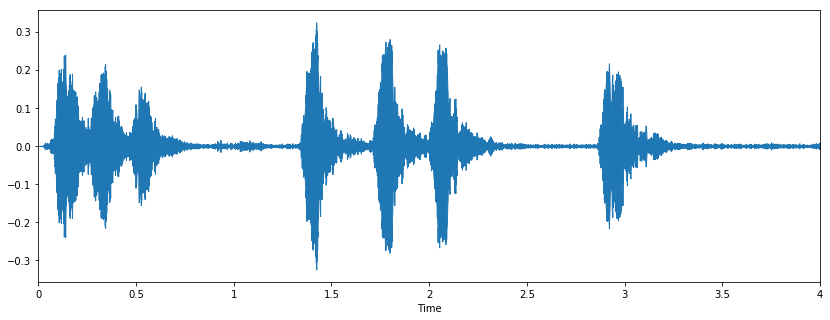

In [6]:
# Dog sound sample
filename = 'UrbanSound8K/dog_bark.wav'
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)
    

In [7]:
# Librosa provides the normalized sample rate
sample_rate

22050

In [7]:
# Another package to check the sample rate but its not normalized hence the value is different
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)
wave_sample_rate

44100

In [8]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-399, -115],
       [-388, -111],
       [-386, -105]], dtype=int16)

In [9]:
# Normalized Audio data looks this. Ranges between -1 to 1. 
data

array([ 0.        ,  0.        ,  0.        , ..., -0.00792928,
       -0.00775586, -0.00803613], dtype=float32)

In [14]:
# Read the mata data file of all the Audios
import pandas as pd
import os
import librosa
import numpy as np

audio_dataset_path = 'UrbanSound8K/audio'
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [15]:
### check if data is imbalanced. Looks fairly balanced data with 10 categories
metadata['class'].value_counts()

children_playing    1000
dog_bark            1000
drilling            1000
street_music        1000
air_conditioner     1000
jackhammer          1000
engine_idling       1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

### Mel frequency cepstral coefficient MFCC

Youtube video to explan MFCC --> https://www.youtube.com/watch?v=4_SH2nfbQZ8

MFCC converts the Audio file into the n_mfccs number of features based on the frequency and time 

In [18]:
# Providing the normalized audio data file to mfcc, convert into the 40 features
mfccs = librosa.feature.mfcc(data,sample_rate,n_mfcc=40)
mfccs.shape

(40, 173)

In [17]:
# Creating the file path to read all the audio files present in 10 different folders
file = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(5)+'/',str('100032-3-0-0.wav'))
file

'C:\\Users\\anurag.mittal\\Desktop\\Python notes\\Projects\\Audio Classification\\UrbanSound8K\\audio\\fold5/100032-3-0-0.wav'

In [19]:
# Function to convert the each audio file into the 40 set of features using MFCC
# each audio file after convertion has shape of (40,..) taking the mean and converting into single row vector
def feature_extractor(file):
    #file = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(5)+'/',str('100032-3-0-0.wav'))
    data,sample_rate = librosa.load(file,res_type='kaiser_fast')
    mfcc_features = librosa.feature.mfcc(data,sample_rate,n_mfcc=40)
    mfcc_features_scaled = np.mean(mfcc_features.T,axis=0)
    
    return mfcc_features_scaled

In [20]:
# it helps in iteration of the metadata file 
from tqdm import tqdm

In [27]:
# Converting the Audio file into features and adding the class label with them. 

extracted_features = []
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row['fold'])+'/',str(row['slice_file_name']))
    final_class_labels = row['class']
    data = feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])


3555it [06:35,  9.22it/s]C:\Users\anurag.mittal\AppData\Roaming\Python\Python37\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8324it [14:57, 12.08it/s]C:\Users\anurag.mittal\AppData\Roaming\Python\Python37\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8328it [14:57, 15.14it/s]C:\Users\anurag.mittal\AppData\Roaming\Python\Python37\site-packages\librosa\core\spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [15:39, 10.35it/s]


In [28]:
extracted_features

[[array([-2.1579300e+02,  7.1666122e+01, -1.3181377e+02, -5.2091335e+01,
         -2.2115967e+01, -2.1764179e+01, -1.1183748e+01,  1.8912683e+01,
          6.7266383e+00,  1.4556893e+01, -1.1782044e+01,  2.3010364e+00,
         -1.7251303e+01,  1.0052422e+01, -6.0094995e+00, -1.3153189e+00,
         -1.7693510e+01,  1.1171229e+00, -4.3699460e+00,  7.2629538e+00,
         -1.1815970e+01, -7.4952607e+00,  5.4577136e+00, -2.9442444e+00,
         -5.8693881e+00, -9.8654032e-02, -3.2121704e+00,  4.6092505e+00,
         -5.8293257e+00, -5.3475070e+00,  1.3341191e+00,  7.1307817e+00,
         -7.9450063e-02,  1.7109238e+00, -5.6941991e+00, -2.9041715e+00,
          3.0366955e+00, -1.6827587e+00, -8.8585812e-01,  3.5438800e-01],
        dtype=float32), 'dog_bark'],
 [array([-4.24686859e+02,  1.10562294e+02, -5.41482391e+01,  6.20107384e+01,
         -7.09515810e-01,  1.81573944e+01,  1.44515562e+00,  1.11611280e+01,
         -1.70588994e+00,  1.23604507e+01, -1.10554781e+01,  2.07365742e+01,
 

In [29]:
# Convering the extracted features into the data frame
extracted_features_df = pd.DataFrame(extracted_features,columns=['features','class'])
extracted_features_df.head()

,features,class
0,"[-215.793, 71.66612, -131.81377, -52.091335, -...",dog_bark
1,"[-424.68686, 110.562294, -54.14824, 62.01074, ...",children_playing
2,"[-459.56473, 122.80033, -47.924713, 53.265697,...",children_playing
3,"[-414.55374, 102.89688, -36.66496, 54.18041, 0...",children_playing
4,"[-447.39703, 115.0954, -53.809113, 61.608585, ...",children_playing


In [106]:
# Dividing the features and class into x and y variable
X = np.array(extracted_features_df['features'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [107]:
X.shape

(8732, 40)

In [108]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [109]:
#Label Encoding
#y = np.array(pd.get_dummies(y))

#label encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [110]:
y.shape

(8732, 10)

In [112]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [113]:
# Spliting the data into 80%  train and 20% test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state=0)

In [114]:
print("X_train Shape "+ str(X_train.shape))
print("y_train Shape "+ str(y_train.shape))
print("X_test Shape "+ str(X_test.shape))
print("y_test Shape "+ str(y_test.shape))

X_train Shape (6985, 40)
y_train Shape (6985, 10)
X_test Shape (1747, 40)
y_test Shape (1747, 10)


## Model Creation

Develop the ANN model with 3 layers and 100 neurons using the tensorflow.keras <br>
Using the dropout as 0.5 <br>
Optimizer as Adam<br>
Activation function is Relu and softmax for output<br>

In [21]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [117]:
# importing the required packages

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [118]:
num_labels = y.shape[1]

In [119]:
# Building the ANN model of 3 layers

model = Sequential()
### First layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### Second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
### Third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### output layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [120]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_9 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)              

In [121]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [123]:
# Training model

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime as dt

num_epocs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath = 'saved_models/audio_classification.hdf5',verbose  = 1,save_best_only = True)

start = dt.now()
    
model.fit(X_train, y_train, batch_size = num_batch_size, epochs=num_epocs, validation_data=(X_test,y_test), callbacks=[checkpointer])

duration = dt.now() - start
print('Training completed in time:',duration)

Epoch 1/100
219/219 [==============================] - ETA: 2:46 - loss: 64.3602 - accuracy: 0.156 - ETA: 0s - loss: 49.6327 - accuracy: 0.1401  - ETA: 0s - loss: 43.9277 - accuracy: 0.131 - ETA: 0s - loss: 40.0938 - accuracy: 0.126 - ETA: 0s - loss: 36.7556 - accuracy: 0.123 - ETA: 0s - loss: 33.6025 - accuracy: 0.122 - ETA: 0s - loss: 30.2477 - accuracy: 0.121 - ETA: 0s - loss: 27.9779 - accuracy: 0.120 - ETA: 0s - loss: 26.7088 - accuracy: 0.120 - ETA: 0s - loss: 25.5735 - accuracy: 0.120 - ETA: 0s - loss: 24.6812 - accuracy: 0.119 - ETA: 0s - loss: 23.5668 - accuracy: 0.119 - 2s 5ms/step - loss: 22.6769 - accuracy: 0.1197 - val_loss: 2.2865 - val_accuracy: 0.1191

Epoch 00001: val_loss improved from inf to 2.28655, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - ETA: 2s - loss: 3.2930 - accuracy: 0.06 - ETA: 0s - loss: 2.7559 - accuracy: 0.11 - ETA: 0s - loss: 2.7435 - accuracy: 0.12 - ETA: 0s - loss: 2.7389 - accuracy: 

219/219 [==============================] - ETA: 1s - loss: 1.7224 - accuracy: 0.28 - ETA: 0s - loss: 2.0360 - accuracy: 0.21 - ETA: 0s - loss: 2.0668 - accuracy: 0.21 - ETA: 0s - loss: 2.0791 - accuracy: 0.21 - ETA: 0s - loss: 2.0808 - accuracy: 0.21 - ETA: 0s - loss: 2.0795 - accuracy: 0.21 - ETA: 0s - loss: 2.0786 - accuracy: 0.21 - ETA: 0s - loss: 2.0776 - accuracy: 0.21 - ETA: 0s - loss: 2.0768 - accuracy: 0.21 - ETA: 0s - loss: 2.0766 - accuracy: 0.21 - ETA: 0s - loss: 2.0765 - accuracy: 0.21 - ETA: 0s - loss: 2.0763 - accuracy: 0.22 - ETA: 0s - loss: 2.0760 - accuracy: 0.22 - ETA: 0s - loss: 2.0759 - accuracy: 0.22 - ETA: 0s - loss: 2.0759 - accuracy: 0.22 - 1s 4ms/step - loss: 2.0759 - accuracy: 0.2215 - val_loss: 1.9652 - val_accuracy: 0.2873

Epoch 00010: val_loss did not improve from 1.96477
Epoch 11/100
219/219 [==============================] - ETA: 1s - loss: 1.9749 - accuracy: 0.28 - ETA: 0s - loss: 2.0788 - accuracy: 0.21 - ETA: 0s - loss: 2.0907 - accuracy: 0.20 - ETA: 

219/219 [==============================] - ETA: 0s - loss: 2.1876 - accuracy: 0.28 - ETA: 0s - loss: 1.7322 - accuracy: 0.36 - ETA: 0s - loss: 1.7161 - accuracy: 0.37 - ETA: 0s - loss: 1.7082 - accuracy: 0.37 - ETA: 0s - loss: 1.7014 - accuracy: 0.38 - ETA: 0s - loss: 1.6966 - accuracy: 0.38 - ETA: 0s - loss: 1.6909 - accuracy: 0.38 - ETA: 0s - loss: 1.6865 - accuracy: 0.38 - ETA: 0s - loss: 1.6834 - accuracy: 0.39 - ETA: 0s - loss: 1.6816 - accuracy: 0.39 - ETA: 0s - loss: 1.6799 - accuracy: 0.39 - ETA: 0s - loss: 1.6783 - accuracy: 0.39 - 1s 4ms/step - loss: 1.6758 - accuracy: 0.3945 - val_loss: 1.4570 - val_accuracy: 0.5163

Epoch 00019: val_loss improved from 1.48253 to 1.45699, saving model to saved_models\audio_classification.hdf5
Epoch 20/100
219/219 [==============================] - ETA: 1s - loss: 1.3539 - accuracy: 0.53 - ETA: 0s - loss: 1.7595 - accuracy: 0.41 - ETA: 0s - loss: 1.7224 - accuracy: 0.40 - ETA: 0s - loss: 1.7032 - accuracy: 0.41 - ETA: 0s - loss: 1.6903 - accu

219/219 [==============================] - ETA: 1s - loss: 1.1863 - accuracy: 0.50 - ETA: 0s - loss: 1.4174 - accuracy: 0.51 - ETA: 0s - loss: 1.4187 - accuracy: 0.51 - ETA: 0s - loss: 1.4190 - accuracy: 0.51 - ETA: 0s - loss: 1.4173 - accuracy: 0.51 - ETA: 0s - loss: 1.4168 - accuracy: 0.51 - ETA: 0s - loss: 1.4160 - accuracy: 0.51 - ETA: 0s - loss: 1.4141 - accuracy: 0.51 - ETA: 0s - loss: 1.4117 - accuracy: 0.51 - ETA: 0s - loss: 1.4099 - accuracy: 0.51 - ETA: 0s - loss: 1.4088 - accuracy: 0.51 - 1s 3ms/step - loss: 1.4081 - accuracy: 0.5177 - val_loss: 1.1929 - val_accuracy: 0.5953

Epoch 00029: val_loss improved from 1.20156 to 1.19286, saving model to saved_models\audio_classification.hdf5
Epoch 30/100
219/219 [==============================] - ETA: 0s - loss: 1.4026 - accuracy: 0.43 - ETA: 0s - loss: 1.4398 - accuracy: 0.47 - ETA: 0s - loss: 1.4078 - accuracy: 0.48 - ETA: 0s - loss: 1.4035 - accuracy: 0.48 - ETA: 0s - loss: 1.4040 - accuracy: 0.49 - ETA: 0s - loss: 1.4052 - accu

Epoch 00038: val_loss improved from 1.07315 to 1.05995, saving model to saved_models\audio_classification.hdf5
Epoch 39/100
219/219 [==============================] - ETA: 1s - loss: 1.0959 - accuracy: 0.62 - ETA: 0s - loss: 1.2842 - accuracy: 0.56 - ETA: 0s - loss: 1.2688 - accuracy: 0.57 - ETA: 0s - loss: 1.2569 - accuracy: 0.57 - ETA: 0s - loss: 1.2481 - accuracy: 0.57 - ETA: 0s - loss: 1.2441 - accuracy: 0.57 - ETA: 0s - loss: 1.2446 - accuracy: 0.57 - ETA: 0s - loss: 1.2440 - accuracy: 0.57 - ETA: 0s - loss: 1.2432 - accuracy: 0.57 - ETA: 0s - loss: 1.2430 - accuracy: 0.57 - ETA: 0s - loss: 1.2427 - accuracy: 0.57 - ETA: 0s - loss: 1.2419 - accuracy: 0.57 - ETA: 0s - loss: 1.2411 - accuracy: 0.57 - ETA: 0s - loss: 1.2403 - accuracy: 0.57 - ETA: 0s - loss: 1.2397 - accuracy: 0.57 - 1s 4ms/step - loss: 1.2396 - accuracy: 0.5798 - val_loss: 1.0494 - val_accuracy: 0.6726

Epoch 00039: val_loss improved from 1.05995 to 1.04941, saving model to saved_models\audio_classification.hdf5
Epo

219/219 [==============================] - ETA: 1s - loss: 1.3054 - accuracy: 0.62 - ETA: 0s - loss: 1.2278 - accuracy: 0.59 - ETA: 0s - loss: 1.2144 - accuracy: 0.58 - ETA: 0s - loss: 1.2191 - accuracy: 0.58 - ETA: 0s - loss: 1.2172 - accuracy: 0.58 - ETA: 0s - loss: 1.2152 - accuracy: 0.58 - ETA: 0s - loss: 1.2136 - accuracy: 0.58 - ETA: 0s - loss: 1.2127 - accuracy: 0.58 - ETA: 0s - loss: 1.2110 - accuracy: 0.58 - ETA: 0s - loss: 1.2094 - accuracy: 0.58 - ETA: 0s - loss: 1.2085 - accuracy: 0.59 - ETA: 0s - loss: 1.2077 - accuracy: 0.59 - ETA: 0s - loss: 1.2065 - accuracy: 0.59 - ETA: 0s - loss: 1.2051 - accuracy: 0.59 - 1s 4ms/step - loss: 1.2041 - accuracy: 0.5919 - val_loss: 1.0155 - val_accuracy: 0.6657

Epoch 00048: val_loss did not improve from 1.00527
Epoch 49/100
219/219 [==============================] - ETA: 0s - loss: 1.2016 - accuracy: 0.59 - ETA: 0s - loss: 1.1436 - accuracy: 0.61 - ETA: 0s - loss: 1.1523 - accuracy: 0.61 - ETA: 0s - loss: 1.1551 - accuracy: 0.61 - ETA: 

219/219 [==============================] - ETA: 2s - loss: 1.2285 - accuracy: 0.65 - ETA: 1s - loss: 1.2640 - accuracy: 0.62 - ETA: 1s - loss: 1.2419 - accuracy: 0.62 - ETA: 0s - loss: 1.2285 - accuracy: 0.62 - ETA: 0s - loss: 1.2118 - accuracy: 0.62 - ETA: 0s - loss: 1.1989 - accuracy: 0.62 - ETA: 0s - loss: 1.1866 - accuracy: 0.62 - ETA: 0s - loss: 1.1793 - accuracy: 0.62 - ETA: 0s - loss: 1.1734 - accuracy: 0.62 - ETA: 0s - loss: 1.1692 - accuracy: 0.62 - ETA: 0s - loss: 1.1661 - accuracy: 0.62 - ETA: 0s - loss: 1.1630 - accuracy: 0.62 - ETA: 0s - loss: 1.1599 - accuracy: 0.62 - ETA: 0s - loss: 1.1575 - accuracy: 0.62 - ETA: 0s - loss: 1.1555 - accuracy: 0.62 - ETA: 0s - loss: 1.1538 - accuracy: 0.62 - ETA: 0s - loss: 1.1521 - accuracy: 0.62 - ETA: 0s - loss: 1.1504 - accuracy: 0.62 - ETA: 0s - loss: 1.1490 - accuracy: 0.62 - 1s 5ms/step - loss: 1.1484 - accuracy: 0.6266 - val_loss: 0.9319 - val_accuracy: 0.6989

Epoch 00057: val_loss improved from 0.94441 to 0.93186, saving model t

219/219 [==============================] - ETA: 2s - loss: 1.0406 - accuracy: 0.65 - ETA: 1s - loss: 1.0971 - accuracy: 0.63 - ETA: 0s - loss: 1.0590 - accuracy: 0.65 - ETA: 0s - loss: 1.0506 - accuracy: 0.65 - ETA: 0s - loss: 1.0496 - accuracy: 0.65 - ETA: 0s - loss: 1.0493 - accuracy: 0.65 - ETA: 0s - loss: 1.0484 - accuracy: 0.65 - ETA: 0s - loss: 1.0471 - accuracy: 0.65 - ETA: 0s - loss: 1.0461 - accuracy: 0.65 - ETA: 0s - loss: 1.0464 - accuracy: 0.65 - ETA: 0s - loss: 1.0470 - accuracy: 0.65 - ETA: 0s - loss: 1.0481 - accuracy: 0.65 - ETA: 0s - loss: 1.0493 - accuracy: 0.65 - ETA: 0s - loss: 1.0506 - accuracy: 0.65 - ETA: 0s - loss: 1.0517 - accuracy: 0.65 - ETA: 0s - loss: 1.0525 - accuracy: 0.65 - 1s 5ms/step - loss: 1.0529 - accuracy: 0.6559 - val_loss: 0.8938 - val_accuracy: 0.7172

Epoch 00066: val_loss did not improve from 0.88200
Epoch 67/100
219/219 [==============================] - ETA: 1s - loss: 1.1310 - accuracy: 0.59 - ETA: 0s - loss: 1.1171 - accuracy: 0.62 - ETA: 

219/219 [==============================] - ETA: 1s - loss: 0.8306 - accuracy: 0.75 - ETA: 0s - loss: 1.0731 - accuracy: 0.61 - ETA: 0s - loss: 1.0537 - accuracy: 0.63 - ETA: 0s - loss: 1.0500 - accuracy: 0.64 - ETA: 0s - loss: 1.0491 - accuracy: 0.64 - ETA: 0s - loss: 1.0483 - accuracy: 0.64 - ETA: 0s - loss: 1.0479 - accuracy: 0.64 - ETA: 0s - loss: 1.0473 - accuracy: 0.64 - ETA: 0s - loss: 1.0464 - accuracy: 0.64 - ETA: 0s - loss: 1.0448 - accuracy: 0.65 - ETA: 0s - loss: 1.0433 - accuracy: 0.65 - ETA: 0s - loss: 1.0420 - accuracy: 0.65 - ETA: 0s - loss: 1.0408 - accuracy: 0.65 - ETA: 0s - loss: 1.0405 - accuracy: 0.65 - ETA: 0s - loss: 1.0404 - accuracy: 0.65 - 1s 4ms/step - loss: 1.0404 - accuracy: 0.6549 - val_loss: 0.8630 - val_accuracy: 0.7201

Epoch 00075: val_loss improved from 0.87865 to 0.86305, saving model to saved_models\audio_classification.hdf5
Epoch 76/100
219/219 [==============================] - ETA: 2s - loss: 0.9303 - accuracy: 0.65 - ETA: 0s - loss: 0.9432 - accu

219/219 [==============================] - ETA: 2s - loss: 0.9031 - accuracy: 0.62 - ETA: 0s - loss: 0.8738 - accuracy: 0.69 - ETA: 0s - loss: 0.9279 - accuracy: 0.67 - ETA: 0s - loss: 0.9530 - accuracy: 0.67 - ETA: 0s - loss: 0.9649 - accuracy: 0.67 - ETA: 0s - loss: 0.9724 - accuracy: 0.67 - ETA: 0s - loss: 0.9779 - accuracy: 0.66 - ETA: 0s - loss: 0.9812 - accuracy: 0.66 - ETA: 0s - loss: 0.9829 - accuracy: 0.66 - ETA: 0s - loss: 0.9839 - accuracy: 0.66 - ETA: 0s - loss: 0.9844 - accuracy: 0.67 - ETA: 0s - loss: 0.9855 - accuracy: 0.67 - ETA: 0s - loss: 0.9871 - accuracy: 0.67 - ETA: 0s - loss: 0.9894 - accuracy: 0.67 - 1s 4ms/step - loss: 0.9896 - accuracy: 0.6707 - val_loss: 0.8508 - val_accuracy: 0.7373

Epoch 00085: val_loss did not improve from 0.83572
Epoch 86/100
219/219 [==============================] - ETA: 1s - loss: 0.5701 - accuracy: 0.90 - ETA: 0s - loss: 0.9890 - accuracy: 0.69 - ETA: 0s - loss: 0.9845 - accuracy: 0.68 - ETA: 0s - loss: 0.9841 - accuracy: 0.68 - ETA: 

219/219 [==============================] - ETA: 1s - loss: 0.7480 - accuracy: 0.71 - ETA: 0s - loss: 0.9925 - accuracy: 0.65 - ETA: 0s - loss: 1.0113 - accuracy: 0.65 - ETA: 0s - loss: 1.0222 - accuracy: 0.64 - ETA: 0s - loss: 1.0268 - accuracy: 0.64 - ETA: 0s - loss: 1.0271 - accuracy: 0.64 - ETA: 0s - loss: 1.0256 - accuracy: 0.65 - ETA: 0s - loss: 1.0231 - accuracy: 0.65 - ETA: 0s - loss: 1.0215 - accuracy: 0.65 - ETA: 0s - loss: 1.0196 - accuracy: 0.65 - ETA: 0s - loss: 1.0186 - accuracy: 0.65 - ETA: 0s - loss: 1.0180 - accuracy: 0.65 - ETA: 0s - loss: 1.0170 - accuracy: 0.65 - ETA: 0s - loss: 1.0163 - accuracy: 0.65 - ETA: 0s - loss: 1.0154 - accuracy: 0.65 - 1s 4ms/step - loss: 1.0150 - accuracy: 0.6598 - val_loss: 0.8298 - val_accuracy: 0.7378

Epoch 00095: val_loss did not improve from 0.81908
Epoch 96/100
219/219 [==============================] - ETA: 1s - loss: 1.1293 - accuracy: 0.65 - ETA: 1s - loss: 0.9593 - accuracy: 0.67 - ETA: 1s - loss: 0.9284 - accuracy: 0.68 - ETA: 

In [124]:
test_accuracy = model.evaluate(X_test,y_test,verbose = 0)
test_accuracy[1]

0.7366914749145508

## Predict outcome of the random sample audio

In [ ]:
file = filename
mfccs_scaled_features = feature_extractor(file)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
#predicted_label = model.predict_classes(mfccs_scaled_features)
predicted_class = labelencoder.inverse_transform(predicted_label)

In [140]:
#predicted_class
list(predicted_class.flatten())


['dog_bark']

In [141]:
def test_prediciton(file):
    file = filename
    mfccs_scaled_features = feature_extractor(file)
    mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
    predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
    predicted_class = labelencoder.inverse_transform(predicted_label)
    return list(predicted_class.flatten())
    

In [143]:
filename = 'UrbanSound8K/Street_music.wav'
print(test_prediciton(filename))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['street_music']
